<center> <h2> <big><font color= #ff33ff>Data Mining : Classification des Tweets</font> </big></h2></center>
<br>
<br>
<h2><font color=#ff99ff>Objectifs du TP:</font></h2>
<br>
<br>
• Maitriser l’API de twitter pour l’extraction des tweets.
<br>
<br>
• Maitriser la partie NLP (natural language processing) avec NLTK en Python.
<br>
<br>
• Appliquer les principes de nettoyage des données.
<br>
<br>
• Classer les tweets : regrouper ensemble les tweets qui sont similaires.<br>
<br>



<h3><font color= #4dc3ff> Importation des biblioteque necessaires</font></h3>

In [7]:
import pandas as pd 
import tweepy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import warnings 

<h3> <font color= #4dc3ff>Extraction des tweets dans un fichier csv en utilisant l'API obtenu gràce au compte tweeter developper </font> </h3> 
<br>
l'API :
<div><img src ="api.png" width="600px" height="300px" align="left"></div>



In [6]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 
  
  
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T"
    consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA"
    access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT"
    access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 500
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 

Enter Twitter HashTag to search for
music
Enter Date since The Tweets are required in yyyy-mm--dd
2020-01-01

Tweet 1:
Username:JonComms
Description:Video Producer for @nintendolife @pushsquare @purexbox - Previously @GameXplain. Gyro controls are pretty cool. Kiddy Kong is not. Header by @rayluaza
Location:Hampshire, England
Following Count:501
Follower Count:33412
Total Tweets:29044
Retweet Count:29
Tweet Text:When JRPG final boss music doesn't have Latin chanting. https://t.co/uZcq5s2V9g
Hashtags Used:[]

Tweet 2:
Username:Bro_Zenzen
Description:Join my WhatsApp TV 👉 https://t.co/PSgFCS72Fj ■ Bambeh wey sabi shoot shot ☄ ■ Telecommunication Engineer  🛰👨‍💻 ■ Pisces 🤴 ■ Instant Follow Back 😉 ■
Location:Out of Cameroon IJN
Following Count:2692
Follower Count:2109
Total Tweets:15193
Retweet Count:225
Tweet Text:Olamide gave us lil Kesh,Adekunle Gold and Fireboy.

Davido gave us Mayorkun,Dremo and Perruzi.

Don jazzy gave us half of Nigerian music industry 

M I gave us ice prince,Blaq b


Tweet 46:
Username:BROS4XCX
Description:
Location:he/him | under bitches' skin
Following Count:496
Follower Count:325
Total Tweets:13400
Retweet Count:1643
Tweet Text:Fiona Apple calls out the #GRAMMYs for nominating Dr. Luke this year under the pseudonym Tyson Trax in new @Guardian interview:

“They had Kesha up there singing ‘Praying,’ and now they’re gonna go, ‘oh, but it’s Tyson Trax!’” 

🔗: https://t.co/zoiNDJQgNP https://t.co/oEQ8UvFAYe
Hashtags Used:['GRAMMYs']

Tweet 47:
Username:pocketpippin
Description:queer nonbinary ace 🏳️‍🌈 | @DiviniationGG 🦌 | @PlantArmy 🌱| Ariadne in @tabletoptavern_ 🎲| jack of all trades, storyteller at 💛| pocketpippinttv@gmail.com
Location:
Following Count:932
Follower Count:230
Total Tweets:951
Retweet Count:1
Tweet Text:We're so pleased to share that our holiday show will feature music and art from the @Refugee_Women community!

Tune in this Sunday at 4pm UTC to sing and dance along! https://t.co/lKAmq0NSkL
Hashtags Used:[]

Tweet 48:
Username:_Rene

Tweet 86:
Username:kannanm22399073
Description:
Location:
Following Count:1994
Follower Count:47
Total Tweets:3064
Retweet Count:34
Tweet Text:#PaavaKadhaigal #LovePannaUttranum @VigneshShivN - Highly enjoyable, despite the dark theme. @yoursanjali is fantastic, Kalki is cool, Ani's music is again a plus &amp; the tough short guy is a laugh riot! Has quirky wordplay &amp; the spirit of NRD with a spirited female lead.. Nice! https://t.co/MZfGO21yyv
Hashtags Used:['PaavaKadhaigal', 'LovePannaUttranum']

Tweet 87:
Username:tidanrebenelym
Description:bonsai
Location:
Following Count:105
Follower Count:19
Total Tweets:24007
Retweet Count:5958
Tweet Text:✅ I NEED U - First Music Show Win 
✅ DYNAMITE - First Hot 100 #1 and Grammy nominated Song 
✅ LIFE GOES ON - First korean Song Hot 100 #1 

@BTS_twt https://t.co/UdSD9dTXtd
Hashtags Used:[]

Tweet 88:
Username:KDabbs82
Description:Kenny ¥ single ¥ rocker/juggalo ¥ hardcore gamer ¥ movie lover ¥ anything else ask me. Oh and follow me. I foll


Tweet 127:
Username:LifeLivingRec
Description:@KwakuDMC @JayBahd1 @cedicityboy @ygaokenneth @ReggieOsei3 @SeanLifer @kawabanga___ @kelvins_young @thywill_ofgod @thomasthegreats @officialdeeter1 @RabbyJoness
Location:Kumasi, Ghana west africa
Following Count:78
Follower Count:2430
Total Tweets:1371
Retweet Count:2
Tweet Text:Out now on all music platforms .

Apple Music :https://t.co/Hi7kfDZYB3

Audiomack : https://t.co/TVeH0B17zR

Platforms :https://t.co/satHXl22jz
Out Now 🔥🔥🔥🔥🔥🔥🔥
Kindly share 🙏🏾😊
Banger🔥🔥
 #Askaa #MaDrip @SeanLifer
Hashtags Used:[]

Tweet 128:
Username:italia_eminem
Description:🇮🇹 Il must dell'informazione per tutti i fan italiani di Eminem
🇺🇸 The place to be for all the Eminem's fans ☆☆☆
Italian bloggers/fanpage
Location:Instagram @eminemitalia1 
Following Count:260
Follower Count:2376
Total Tweets:9329
Retweet Count:51
Tweet Text:The superstar rapper surprise-released a sequel to January's "Music to be Murdered By" at midnight Friday. Titled "Music to be Murdered B


Tweet 167:
Username:ryeowoolil7
Description:방탄소년단🌟
아미💜
OT7💫
방탄소년단 빌보드 HOT100차트 1위
Location:SEOUL Lover 🦋
Following Count:56
Follower Count:25
Total Tweets:5505
Retweet Count:178570
Tweet Text:Music unites us all TONIGHT! We can’t wait to perform at the @BBMAs TONIGHT at 8/7c on NBC. #BTSxBBMAs https://t.co/FqV7H1pURl
Hashtags Used:['BTSxBBMAs']

Tweet 168:
Username:happierseavcy
Description:-so ignore the risk and take the fall, and if it's meant to be it'll be worth it all ⅖ (she/her)
Location:estonia 🇪🇪
Following Count:871
Follower Count:889
Total Tweets:13056
Retweet Count:0
Tweet Text:@whydontwemusic @MTV i literally can’t stop watching the music video, it makes me so happy
Hashtags Used:[]

Tweet 169:
Username:Napstasha
Description:Neo Cortex is my dad • #ACAB #BLM • It/Its • Some kinda alt bich • 22 • 🖤@MonaLoignon @Viowolet 🖤
Location:that place in stranger things
Following Count:285
Follower Count:76
Total Tweets:1954
Retweet Count:13
Tweet Text:Eminem drop music and white dud

Tweet 206:
Username:wnterchld
Description:If its not abt Kim Taehyung I'm not interested..
Location:
Following Count:393
Follower Count:136
Total Tweets:28163
Retweet Count:45
Tweet Text:taehyung saying dec 30 isn't that special is all the more reason to show up for him and make him FEEL how loved he is, how appreciated he is, how much his music, his voice, his artistry means to us, him always being so humble makes him all the more deserving of so much love
Hashtags Used:[]

Tweet 207:
Username:Shadyinfo
Description:I saw Eminem on 25/10/2019.
Location:
Following Count:438
Follower Count:12378
Total Tweets:10534
Retweet Count:0
Tweet Text:Eminem’s “Music To Be Murdered By - Side B” (Deluxe) is instant classic.
Hashtags Used:[]

Tweet 208:
Username:Minthemadnezz
Description:-𝕁𝕦𝕡𝕚𝕥𝕖𝕣 𝕠𝕗 𝕥𝕙𝕖 𝕄𝕠𝕟𝕜𝕖𝕪 ℂ𝔼𝕆-
Sʜᴇ/ʜᴇʀ|14
ℂ𝕦𝕣𝕣𝕖𝕟𝕥𝔽𝕒𝕟𝕕𝕠𝕞𝕤: ℙ𝕖𝕣𝕤𝕠𝕟𝕒+𝔸𝕔𝕖𝔸𝕥𝕥𝕠𝕣𝕟𝕖𝕪+𝕋𝕎𝔼𝕎𝕐
↓𝕞𝕪 𝕔𝕒𝕣𝕣𝕕↓
Location:Artist~
Following Count:517
Follower Count:158
Total Tweets:5442
Retweet Count:1
Tweet Text:hot take: persona music

Total Tweets:1100
Retweet Count:163
Tweet Text:🎉 'Golden' by Harry Styles has been ranked by Idolator as the 15th best music video of 2020. https://t.co/pIIr7tF49H
Hashtags Used:[]

Tweet 248:
Username:tiwaori_15
Description:Likes and laughs || Tweets and retweets...it's all I do on this bird app.
I follow back religiously
Location:Otta, Nigeria
Following Count:182
Follower Count:182
Total Tweets:108
Retweet Count:74
Tweet Text:2020 was shitty,but the music bruuuu&gt;&gt;&gt;&gt;&gt;
Hashtags Used:[]

Tweet 249:
Username:TeamWizkidFc
Description:Official Fan Page of @wizkidayo 🦅❤
Bringing you the latest updates and achievements about Starboy 💥

#MadeInLagos out now!
Location:
Following Count:111
Follower Count:11307
Total Tweets:5485
Retweet Count:49
Tweet Text:US FANS, more energy! 🌟 

#MadeinLagos is the only album by an African artist in the Top 200 on US Apple right now.

Stream harder! https://t.co/cKV6UR0uhx https://t.co/WKAUoF5N6I
Hashtags Used:['MadeinLagos']

Tweet 250:
Userna


Tweet 287:
Username:kasbabyy_
Description:🇲🇽 || ♓️ || 🏳️‍🌈
Location:Fifty-Five Nina 
Following Count:700
Follower Count:795
Total Tweets:8963
Retweet Count:1069
Tweet Text:me vibing to music after i just coughed my lungs out https://t.co/0P3wsaNHzm
Hashtags Used:[]

Tweet 288:
Username:deadringer_98
Description:XXX
Location:
Following Count:1267
Follower Count:161
Total Tweets:1604
Retweet Count:0
Tweet Text:I can’t emphasize how much I fucking HATE Christmas music
Hashtags Used:[]

Tweet 289:
Username:jheeL47863508
Description:JungkookOurEuphoria
정국이 너무 좋아+++선팔♥맞팔 대환영+++정무행알
Location:
Following Count:552
Follower Count:184
Total Tweets:22336
Retweet Count:432
Tweet Text:Jungkook on KBS Music Festival, 'Life Goes On' Performance by BTS✨

He's a Prince.😭 https://t.co/WDVYuxS1r5
Hashtags Used:[]

Tweet 290:
Username:CentricityPub
Description:The Publishing department of @Centricity Music. Check out some Centricity Publishing hits on Spotify! https://t.co/6M8Iw5Y0os
Location:Franklin, TN

Following Count:183
Follower Count:48
Total Tweets:5320
Retweet Count:0
Tweet Text:I LOST MY APPLE MUSIC YESTERDAY MORNING AND I LOST LIKE 20 HOURS OF MUSIC I WAS SO PIISSEDD AND I GOT IT BACK SJDJDJ cool
Hashtags Used:[]

Tweet 327:
Username:kaymusty
Description:|| Good governance || National and community development || Production systems and process expert || SDGs Advocate || comments/retweets aren't endorsements.
Location:Lagos, Nigeria
Following Count:2766
Follower Count:1648
Total Tweets:7618
Retweet Count:306
Tweet Text:@jack @unicodeveloper Anything not under control of the Nigerian government thrives, music industry, Nollywood, tech, etc.
Hashtags Used:[]

Tweet 328:
Username:MccarrhyShatta
Description:SHATTA MOVEMENT 
FOR LIFE IS OUR LIFE 

FC BARCELONA
Location:Kumasi, Ghana
Following Count:6522
Follower Count:6267
Total Tweets:2345
Retweet Count:233
Tweet Text:Let’s go hard on this Ghana 🇬🇭, Kumerica !

#AhodwoLasVegas Ft the ‘YOUNG KINGS’ OUT NOW🔥. The #KIPPROJECT....ENJOY

Hashtags Used:[]

Tweet 366:
Username:sseuniewanggae
Description:#JACKSON: 我非常爱你 / I love you very much ♥️ #got7 #exo #nct — #GOT7inParis 19/10/19 — Vee (multi)
Location:wherever Jackson Wang is
Following Count:1267
Follower Count:2466
Total Tweets:41058
Retweet Count:1
Tweet Text:@music_magic_art I wouldn’t expect anything else from GOT7 performance kings 😌♥️✨
Hashtags Used:[]

Tweet 367:
Username:b_SANDEUL920320
Description:B1A4 SANDEUL BOT - 全自動- 本人ではありません‼ エピソードや動画を流してます。
Location:
Following Count:63
Follower Count:279
Total Tweets:117605
Retweet Count:0
Tweet Text:140123 B1A4 Full Cut @ 23rd Seoul Music Awards https://t.co/f9rSjI1ZRL
Hashtags Used:[]

Tweet 368:
Username:wavy63
Description:WI GOT REC. @Madtreazures Private RV CAMP N GO 🏕Mathew 6:33 😷MaskUp #travelwi #outdoors
Location:Instgram & LinkedIn🔗
Following Count:1209
Follower Count:1738
Total Tweets:19169
Retweet Count:0
Tweet Text:🔊Thank You * https://t.co/ik3RC9rMfI
Hashtags Used:[]

Tweet 369:
Username:Itsactualllyash


Tweet 408:
Username:WWPFRadio
Description:wwpfradio@gmail.com
Location:Atlanta, GA, USA
Following Count:337
Follower Count:339
Total Tweets:123526
Retweet Count:0
Tweet Text:♫ #NowPlaying Graham Nash - Better Days https://t.co/ceWWRYiwPO F-Channel ♫
Hashtags Used:['NowPlaying']

Tweet 409:
Username:Moyo______
Description:🇳🇬
Location:I don japa
Following Count:295
Follower Count:315
Total Tweets:5171
Retweet Count:0
Tweet Text:Zinoleesky guy sabi this music p
Hashtags Used:[]

Tweet 410:
Username:MohaiExperiment
Description:#instrumental #postrock #progrock band. Musical experimentation without barriers, constraints or limits. Never stop fighting for the #climatechange cause
Location:Italy
Following Count:14879
Follower Count:21637
Total Tweets:54195
Retweet Count:0
Tweet Text:From "The brightest darkness": V-Man (#experimental):
#AppleMusic : https://t.co/phFLauZiLp
#Spotify : https://t.co/QgSt8C561O
#BandCamp : https://t.co/0ULcgqa1sy
Hashtags Used:['experimental', 'AppleMusic', 'Spot

Tweet 448:
Username:Jordanchis24
Description:follow me ill follow back 25/Black/rican blessed to be alive God has a plan for me just have to be patient
Location:Lorain Ohio
Following Count:2083
Follower Count:1054
Total Tweets:28568
Retweet Count:38
Tweet Text:Swae Lee goes live with person who claims to have stolen his hard drive ➡️ https://t.co/ooUuk9Osfg https://t.co/gGbgYDScpr
Hashtags Used:[]

Tweet 449:
Username:alex_rod85
Description:
Location:
Following Count:169
Follower Count:206
Total Tweets:20688
Retweet Count:1069
Tweet Text:me vibing to music after i just coughed my lungs out https://t.co/0P3wsaNHzm
Hashtags Used:[]

Tweet 450:
Username:Hollydoyle_x
Description:
Location:Renfrew, Scotland
Following Count:244
Follower Count:396
Total Tweets:9633
Retweet Count:12425
Tweet Text:Doing your makeup half naked w music blasting is a fucking vibe
Hashtags Used:[]

Tweet 451:
Username:DeityLolu
Description:Tryna be in my bag all life long ||
Still an act you'd watch :}
Location:nex

Tweet 491:
Username:ag6promo
Description:Charting, Update, News, Defense and Opinions page for the reigning queen of the streaming era
Location:
Following Count:875
Follower Count:1939
Total Tweets:7415
Retweet Count:0
Tweet Text:APPLE MUSIC DAILY; UK 🇬🇧 

#5. "positions" [-1]
#11. "34+35" [-1]
#18. "Santa Tell Me" [+1]
#24. "Oh Santa!" [+3] https://t.co/50urtZKvxP
Hashtags Used:[]

Tweet 492:
Username:prceofsalt
Description:.˚*.·˚✧just made a meal for us both to choke on✧˚·.*˚.
Location:she/her | 19
Following Count:136
Follower Count:202
Total Tweets:14837
Retweet Count:0
Tweet Text:the best part of listening to music by yourself is that u don’t have anxiety that someone isn’t going to like it :) and u can change it whenever u want :)
Hashtags Used:[]

Tweet 493:
Username:SameOldNancy
Description:I gave in, and admitted that God was God. ~ C. S. Lewis. 😷
Location:Ohio, USA
Following Count:3541
Follower Count:980
Total Tweets:59567
Retweet Count:0
Tweet Text:@richardmarx @Jim_Jordan I 

<h3> <font color= #4dc3ff>Concaténation des fichiers csv  </font></h3

In [9]:
df1=pd.read_csv('tweets1.csv')
df2=pd.read_csv('tweets2.csv')
df3= pd.read_csv('tweets3.csv')
df4=pd.read_csv('tweets4.csv')
df5=pd.read_csv('tweets.csv')

df_final=pd.concat([df3,df2,df4,df1,df5], ignore_index=True)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df_final.shape)

df_final.head()

(2000, 10)
(3000, 10)
(911, 10)
(1500, 10)
(2985, 10)
(10396, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,SewaAdewumi,Mofolúwasęwà\n\nsewaadewumi@gmail.com\n\nI am ...,NaN,198,127,1464,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
1,1,_ayobola,Prude.,NaN,1005,1201,38188,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
2,2,FunkeOnafuye,Product & Marketing | Builder @CV_Loft | Contr...,"Lagos, Nigeria",2102,49298,221346,30,"An Esthetic Clinic in Lekki, Lagos is looking ...",[]
3,3,davidhazony,"Associate Editor, Wicked Son Books. Author of ...",Jerusalem,3522,10316,49294,0,the problem with all these is that they are dr...,[]
4,4,justnyu94,hello! I am a kpop enthusiast and love good mu...,Month of The Boyz,325,97,10478,0,omg so much esthetic https://t.co/vve1WUgGjJ,[]


<h3><font color= #4dc3ff>Afficher les informations de notre base obtenue tel que</font></h3
   <br>
 <h4>les nombre des colonnes</h4>   
 <h4>les nom de chaque colonne</h4>   
 <h4>le type de chaque colonne</h4>   


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10396 entries, 0 to 10395
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10396 non-null  int64 
 1   username      10396 non-null  object
 2   description   9308 non-null   object
 3   location      7101 non-null   object
 4   following     10396 non-null  int64 
 5   followers     10396 non-null  int64 
 6   totaltweets   10396 non-null  int64 
 7   retweetcount  10396 non-null  int64 
 8   text          10396 non-null  object
 9   hashtags      10396 non-null  object
dtypes: int64(5), object(5)
memory usage: 812.3+ KB


<h4><font color= #4dc3ff>Elemination des colonnes unitiles</font></h4>

In [11]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets',
           'hashtags',
           'retweetcount'
           
          ]
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df_final.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df_final.head()

,text
0,"An Esthetic Clinic in Lekki, Lagos is looking ..."
1,"An Esthetic Clinic in Lekki, Lagos is looking ..."
2,"An Esthetic Clinic in Lekki, Lagos is looking ..."
3,the problem with all these is that they are dr...
4,omg so much esthetic https://t.co/vve1WUgGjJ


<h2><font color= #ff33ff>Prétraitement des données</font></h2>
<h4><font color= #4dc3ff>Supression des colonnes dupliqués </font></h4>

df_final=df_final.drop_duplicates()


In [13]:
df_final.head()

,text
0,"An Esthetic Clinic in Lekki, Lagos is looking ..."
3,the problem with all these is that they are dr...
4,omg so much esthetic https://t.co/vve1WUgGjJ
5,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...
6,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...


<h4>On remarque que les lignes 2 et 3 ont été supprimées puisqu'elles sont dupliqués et 1 la première ligne dupliquée est conservée</h4>

<h4><font color= #4dc3ff >Elemination des patterns </font></h4>

In [14]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [15]:
df_final['cleaned_tweet'] = np.vectorize(remove_pattern)(df_final['text'], "@[\w]*")

In [16]:
# Remove special characters, numbers, punctuation
df_final['cleaned_tweet'] = df_final['cleaned_tweet'].str.replace("[^a-zA-Z#]", " " )

<h4><font color= #4dc3ff>Supprimer les mentions, des liens </font></h4>

In [17]:
df_final['cleaned_tweet'] = df_final['cleaned_tweet'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem)) 

In [18]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",An Esthetic Clinic in Lekki Lagos is looking ...
3,the problem with all these is that they are dr...,the problem with all these is that they are dr...
4,omg so much esthetic https://t.co/vve1WUgGjJ,omg so much esthetic t co vve WUgGjJ
5,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,thank u nder
6,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,Thankssss


<h4><font color= #4dc3ff> Supprimer les mots de longueur inferieur à 3</font></h4>

In [19]:
df_final['cleaned_tweet'] = df_final['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",Esthetic Clinic Lekki Lagos looking hire entry...
3,the problem with all these is that they are dr...,problem with these that they dreadful esthetic...
4,omg so much esthetic https://t.co/vve1WUgGjJ,much esthetic WUgGjJ
5,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,thank nder
6,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,Thankssss


<h4><font color= #4dc3ff>Rendre les lettres majuscules en miniscules</font></h4>

In [21]:
df_final['cleaned_tweet']= df_final['cleaned_tweet'].str.lower()


In [22]:
df_final.head()

,text,cleaned_tweet
0,"An Esthetic Clinic in Lekki, Lagos is looking ...",esthetic clinic lekki lagos looking hire entry...
3,the problem with all these is that they are dr...,problem with these that they dreadful esthetic...
4,omg so much esthetic https://t.co/vve1WUgGjJ,much esthetic wuggjj
5,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,thank nder
6,@ketoprakjeno @minejunz @ma_esthetic @jenoneot...,thankssss


<h2><font color= #ff33ff>NLP:Natural LanguageProcessing</font></h2>


<h4><font color= #4dc3ff>Tokenization</font></h4>

In [23]:
tokenized_tweet = df_final['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [esthetic, clinic, lekki, lagos, looking, hire...
3    [problem, with, these, that, they, dreadful, e...
4                             [much, esthetic, wuggjj]
5                                        [thank, nder]
6                                          [thankssss]
Name: cleaned_tweet, dtype: object

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


<h4><font color= #4dc3ff>Stemming est un processus basé sur des règles de suppression des suffixes </font></h4>

In [32]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [esthet, clinic, lekki, lago, look, hire, entr...
3    [problem, with, these, that, they, dread, esth...
4                               [much, esthet, wuggjj]
5                                        [thank, nder]
6                                          [thankssss]
Name: cleaned_tweet, dtype: object

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h4><font color= #4dc3ff>Suppression des  stopwords</font></h4>

In [34]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)


{'more', 'then', 'on', 'who', 'there', 'doesn', 'again', 'between', 'its', 'am', 'further', 'he', 'll', 'to', 'in', 'if', 'so', 'me', 'his', 'how', 'don', 'through', "didn't", 'been', 'their', 'was', 'yourselves', 'where', 'weren', 'mustn', 'does', 'what', 'now', 'against', 'o', 'didn', 'themselves', "isn't", 'ourselves', 'down', "couldn't", 'ours', 'and', "hasn't", 'be', 'are', 'd', 'the', 'why', 'did', 'under', 'only', 'same', 'both', 'yours', "doesn't", 'were', 'before', 'after', 'once', 'until', "weren't", 'do', 'nor', "haven't", "it's", 'some', 'not', 'whom', 'this', 'yourself', "wasn't", 'which', 'over', "you'd", "you've", 'being', 'an', 'myself', 'himself', 'you', 'off', 'very', 'mightn', 'when', 'will', 'my', 'other', 'wouldn', 'just', 'haven', 'with', 'wasn', "shouldn't", 'shan', 'these', 'all', 'too', 'itself', 'because', 'below', "hadn't", 'hadn', 'those', 'above', 'had', 'from', 'isn', 'of', "needn't", 'i', 'doing', 'as', 'most', "mustn't", 'by', 'each', "won't", 'ma', "sha

In [35]:
tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

0        [esthet, clinic, lekki, lago, look, hire, entr...
3        [problem, dread, esthet, violat, like, get, ar...
4                                   [much, esthet, wuggjj]
5                                            [thank, nder]
6                                              [thankssss]
                               ...                        
10390                                    [amazon, icjkezn]
10391                         [amazon, ijlnet, pgvciebntj]
10392                             [amazon, bxbk, dxbanakp]
10393    [plenti, nepot, footbal, knob, funni, homerist...
10394    [sore, today, strong, tomorrow, fit, quot, spo...
Name: cleaned_tweet, Length: 7150, dtype: object

In [47]:
df_final.to_csv('data.csv')
df_final=pd.read_csv('data.csv')
df_final.shape

(7150, 3)

<h2><font color= #ff33ff>Vectorisation</font></h2>


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_final['cleaned_tweet'])


In [37]:
print(tfidf)

  (0, 266)	0.5196016706612366
  (0, 976)	0.41243232164587273
  (0, 477)	0.5196016706612366
  (0, 503)	0.46155119825441626
  (0, 258)	0.2773053896768175
  (1, 664)	0.3171335768710864
  (1, 830)	0.2741508921641455
  (1, 456)	0.20066898625722526
  (1, 858)	0.2280675187205795
  (1, 270)	0.2707727375951555
  (1, 209)	0.3217803662240019
  (1, 97)	0.3090384982765769
  (1, 336)	0.26190220641240025
  (1, 481)	0.15399663584700718
  (1, 652)	0.584216860977013
  (1, 258)	0.16125261067935057
  (2, 258)	1.0
  (3, 852)	1.0
  (5, 725)	0.5560799771012307
  (5, 873)	0.4828619561121874
  (5, 321)	0.5865906759641809
  (5, 258)	0.3369432730868686
  (6, 77)	0.7028015328338476
  (6, 452)	0.6136868683520508
  (6, 258)	0.3598033255247187
  :	:
  (7141, 511)	0.33308668966261096
  (7142, 323)	0.6807084847471773
  (7142, 790)	0.7325544067120215
  (7143, 21)	1.0
  (7144, 21)	1.0
  (7145, 21)	1.0
  (7146, 21)	1.0
  (7147, 21)	1.0
  (7148, 323)	0.08319283161302564
  (7148, 277)	0.18831478078703387
  (7148, 310)	0.81

<h2><font color= #ff33ff>Classification des tweets</font></h2>


In [38]:
from sklearn.cluster import KMeans
wcss=[]


In [39]:

for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(tfidf)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration 0, inertia 13430.4369487252
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13958.535375554347
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13985.173000519428
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13866.844570520472
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 14012.17685016086
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 14042.656990385296
Iteration 1, inertia 6909.239655952632
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13987.381835552347
Iteration 1, inertia 6909.239655952632
Conver

Iteration 2, inertia 6689.711319805601
Iteration 3, inertia 6688.800175924427
Iteration 4, inertia 6688.696985098711
Iteration 5, inertia 6688.664632410113
Iteration 6, inertia 6688.655641402167
Iteration 7, inertia 6688.652896159428
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 13082.482964797304
Iteration 1, inertia 6775.739428907254
Iteration 2, inertia 6775.35615592854
Iteration 3, inertia 6775.249927653008
Iteration 4, inertia 6775.154379900829
Iteration 5, inertia 6775.127101924248
Iteration 6, inertia 6775.116253338264
Iteration 7, inertia 6775.11437480414
Iteration 8, inertia 6775.110169111408
Iteration 9, inertia 6775.108394082503
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 13171.421796024768
Iteration 1, inertia 6749.277543432046
Iteration 2, inertia 6741.880428597303
Iteration 3, inertia 6734.873206880822
Iteration 4, inertia 6717.500316539844
Iteration 5, inertia 6671.28925547063
Ite

Iteration 6, inertia 6645.610642778344
Iteration 7, inertia 6645.118222218879
Iteration 8, inertia 6644.98305655412
Iteration 9, inertia 6644.965844841684
Iteration 10, inertia 6644.90130059331
Iteration 11, inertia 6644.508969910987
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 12937.678781620121
Iteration 1, inertia 6606.014673068635
Iteration 2, inertia 6598.73849915946
Iteration 3, inertia 6598.436713916922
Iteration 4, inertia 6598.297956982238
Iteration 5, inertia 6598.239958990755
Iteration 6, inertia 6598.194569632987
Iteration 7, inertia 6598.163495530753
Iteration 8, inertia 6598.152386690933
Iteration 9, inertia 6598.14747961553
Iteration 10, inertia 6598.146463533213
Iteration 11, inertia 6598.145481153452
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 12440.517854835129
Iteration 1, inertia 6554.95102937879
Iteration 2, inertia 6501.791963975062
Iteration 3, inertia 6500.316203009991

Iteration 1, inertia 6529.7061813186
Iteration 2, inertia 6493.60223202934
Iteration 3, inertia 6483.139593402143
Iteration 4, inertia 6481.689644522313
Iteration 5, inertia 6480.528859037492
Iteration 6, inertia 6479.018025956823
Iteration 7, inertia 6476.864876161493
Iteration 8, inertia 6473.031199724574
Iteration 9, inertia 6463.728778252588
Iteration 10, inertia 6438.957671244082
Iteration 11, inertia 6414.008285349534
Iteration 12, inertia 6404.5470324594735
Iteration 13, inertia 6380.129946695108
Iteration 14, inertia 6379.710476913212
Iteration 15, inertia 6379.426089432775
Iteration 16, inertia 6379.187805196847
Iteration 17, inertia 6378.9906151503155
Iteration 18, inertia 6378.886734720407
Iteration 19, inertia 6378.820606626115
Iteration 20, inertia 6378.781048015637
Iteration 21, inertia 6378.76653666651
Iteration 22, inertia 6378.757504990346
Iteration 23, inertia 6378.751737612913
Iteration 24, inertia 6378.748141237373
Iteration 25, inertia 6378.746998760616
Converged a

Iteration 6, inertia 6321.0952918988805
Iteration 7, inertia 6321.058033249469
Iteration 8, inertia 6321.026562820685
Iteration 9, inertia 6321.010567829
Iteration 10, inertia 6321.000443659497
Iteration 11, inertia 6320.995968942916
Iteration 12, inertia 6320.993309404704
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 12682.552279760186
Iteration 1, inertia 6524.818623178536
Iteration 2, inertia 6462.46733823193
Iteration 3, inertia 6403.383442249772
Iteration 4, inertia 6344.696368153438
Iteration 5, inertia 6316.575502914011
Iteration 6, inertia 6315.963095509688
Iteration 7, inertia 6315.531645079714
Iteration 8, inertia 6315.334271898895
Iteration 9, inertia 6315.197358770235
Iteration 10, inertia 6315.047820310712
Iteration 11, inertia 6314.909423325473
Iteration 12, inertia 6314.806623578776
Iteration 13, inertia 6314.71924865528
Iteration 14, inertia 6314.6216531062055
Iteration 15, inertia 6314.532283707476
Iteration 16, inertia 631

Initialization complete
Iteration 0, inertia 12579.232365256796
Iteration 1, inertia 6461.499470685215
Iteration 2, inertia 6346.857982565261
Iteration 3, inertia 6321.770591582066
Iteration 4, inertia 6319.745995918473
Iteration 5, inertia 6318.622338186405
Iteration 6, inertia 6317.7107907634245
Iteration 7, inertia 6316.620043305243
Iteration 8, inertia 6315.72743997691
Iteration 9, inertia 6315.400348850914
Iteration 10, inertia 6315.329502348877
Iteration 11, inertia 6315.317398064461
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 12114.504216667314
Iteration 1, inertia 6367.7829406800565
Iteration 2, inertia 6326.5092142584
Iteration 3, inertia 6323.641895925647
Iteration 4, inertia 6322.1489123783185
Iteration 5, inertia 6320.297125533919
Iteration 6, inertia 6320.180409720091
Iteration 7, inertia 6320.166377445833
Iteration 8, inertia 6320.160372932467
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0,

Iteration 7, inertia 6481.8389295396155
Iteration 8, inertia 6471.38366360033
Iteration 9, inertia 6467.891299224757
Iteration 10, inertia 6467.372149405036
Iteration 11, inertia 6467.244743752082
Iteration 12, inertia 6467.215748455032
Iteration 13, inertia 6467.203108996846
Iteration 14, inertia 6467.201020236915
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 12064.587635904096
Iteration 1, inertia 6354.455916097077
Iteration 2, inertia 6309.000427751944
Iteration 3, inertia 6302.48983267355
Iteration 4, inertia 6299.778305163107
Iteration 5, inertia 6298.458429275718
Iteration 6, inertia 6298.414616453685
Iteration 7, inertia 6298.406079722623
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 11952.392621925324
Iteration 1, inertia 6326.035593342403
Iteration 2, inertia 6280.647777453335
Iteration 3, inertia 6275.579351146562
Iteration 4, inertia 6272.053534812666
Iteration 5, inertia 6268.08290541

Iteration 1, inertia 6335.9170544715735
Iteration 2, inertia 6294.651802143396
Iteration 3, inertia 6288.448482123646
Iteration 4, inertia 6285.32608819779
Iteration 5, inertia 6283.967029812345
Iteration 6, inertia 6283.925010232327
Iteration 7, inertia 6283.9053090123425
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 11894.046124190503
Iteration 1, inertia 6319.993505672801
Iteration 2, inertia 6276.600576219379
Iteration 3, inertia 6270.034552846816
Iteration 4, inertia 6264.914919387403
Iteration 5, inertia 6260.607840267759
Iteration 6, inertia 6256.322149638336
Iteration 7, inertia 6254.737329687394
Iteration 8, inertia 6254.371336899205
Iteration 9, inertia 6254.090748265884
Iteration 10, inertia 6253.902542998114
Iteration 11, inertia 6253.629666341981
Iteration 12, inertia 6253.495929743716
Iteration 13, inertia 6253.393736453098
Iteration 14, inertia 6253.193964812508
Iteration 15, inertia 6252.831880536525
Iteration 16, inertia 625

Iteration 7, inertia 6266.748421834253
Iteration 8, inertia 6265.326943681519
Iteration 9, inertia 6265.260050842243
Iteration 10, inertia 6265.248257335462
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 11789.057421015854
Iteration 1, inertia 6277.988151636681
Iteration 2, inertia 6228.623085778445
Iteration 3, inertia 6221.532033511074
Iteration 4, inertia 6216.278908681099
Iteration 5, inertia 6211.3202638938
Iteration 6, inertia 6207.113084713507
Iteration 7, inertia 6205.013022811467
Iteration 8, inertia 6204.421181317639
Iteration 9, inertia 6204.0197007798815
Iteration 10, inertia 6203.571697121611
Iteration 11, inertia 6203.191161281261
Iteration 12, inertia 6202.770781385583
Iteration 13, inertia 6202.320650128319
Iteration 14, inertia 6202.108368522491
Iteration 15, inertia 6201.9473455018715
Iteration 16, inertia 6201.83383403407
Iteration 17, inertia 6201.734594148086
Iteration 18, inertia 6201.650436223696
Iteration 19, inertia 

Iteration 10, inertia 6194.186260560321
Iteration 11, inertia 6193.789904402288
Iteration 12, inertia 6193.540798540787
Iteration 13, inertia 6193.3323096551985
Iteration 14, inertia 6193.181139843106
Iteration 15, inertia 6193.133262492141
Iteration 16, inertia 6193.11322630565
Iteration 17, inertia 6193.094129265251
Iteration 18, inertia 6193.088409914054
Iteration 19, inertia 6193.080876449131
Iteration 20, inertia 6193.077589057922
Iteration 21, inertia 6193.07600906051
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 11735.749129361258
Iteration 1, inertia 6269.017063435879
Iteration 2, inertia 6216.478187212887
Iteration 3, inertia 6201.372472018236
Iteration 4, inertia 6196.679177706362
Iteration 5, inertia 6194.647740969183
Iteration 6, inertia 6192.667407583343
Iteration 7, inertia 6190.7947880801485
Iteration 8, inertia 6188.843084378511
Iteration 9, inertia 6186.50572756139
Iteration 10, inertia 6183.258862249624
Iteration 11, inert

Iteration 5, inertia 6173.335836510479
Iteration 6, inertia 6171.757452890494
Iteration 7, inertia 6170.724227585541
Iteration 8, inertia 6170.292591169517
Iteration 9, inertia 6169.906577717753
Iteration 10, inertia 6169.608157365473
Iteration 11, inertia 6169.546235631316
Iteration 12, inertia 6169.515590262756
Iteration 13, inertia 6169.506902244092
Iteration 14, inertia 6169.500674601144
Iteration 15, inertia 6169.495695377736
Iteration 16, inertia 6169.492023838742
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 11675.343944717883
Iteration 1, inertia 6254.787825381651
Iteration 2, inertia 6197.065190040398
Iteration 3, inertia 6182.110379320341
Iteration 4, inertia 6177.420736445409
Iteration 5, inertia 6175.798833466297
Iteration 6, inertia 6174.3290393958
Iteration 7, inertia 6173.523000831858
Iteration 8, inertia 6172.908431533199
Iteration 9, inertia 6172.383252883074
Iteration 10, inertia 6172.084054663437
Iteration 11, inertia 617

Iteration 11, inertia 6088.138104256677
Iteration 12, inertia 6085.849315807701
Iteration 13, inertia 6085.600138347228
Iteration 14, inertia 6085.406450157692
Iteration 15, inertia 6085.276660981131
Iteration 16, inertia 6085.122559066079
Iteration 17, inertia 6085.00232672215
Iteration 18, inertia 6084.926372261114
Iteration 19, inertia 6084.8582590083015
Iteration 20, inertia 6084.817293407974
Iteration 21, inertia 6084.796099903452
Iteration 22, inertia 6084.788147488203
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 6683.5528055655395
Iteration 1, inertia 6487.30494834985
Iteration 2, inertia 6438.486938077136
Iteration 3, inertia 6396.839793770522
Iteration 4, inertia 6371.002956236586
Iteration 5, inertia 6349.451841919966
Iteration 6, inertia 6335.0519519757345
Iteration 7, inertia 6320.5472434790945
Iteration 8, inertia 6308.217470755663
Iteration 9, inertia 6298.8141801304755
Iteration 10, inertia 6294.492455802616
Iteration 11, in

Initialization complete
Iteration 0, inertia 11678.473971554748
Iteration 1, inertia 6410.026743632517
Iteration 2, inertia 6318.578712178586
Iteration 3, inertia 6282.265208073222
Iteration 4, inertia 6252.155048587171
Iteration 5, inertia 6198.729487692475
Iteration 6, inertia 6130.089327870141
Iteration 7, inertia 6118.634058403398
Iteration 8, inertia 6117.6933001559055
Iteration 9, inertia 6116.791065133416
Iteration 10, inertia 6116.48647438037
Iteration 11, inertia 6116.4066214103495
Iteration 12, inertia 6116.369528671528
Iteration 13, inertia 6116.328862667375
Iteration 14, inertia 6116.304243228668
Iteration 15, inertia 6116.293387812792
Iteration 16, inertia 6116.281737663458
Iteration 17, inertia 6116.269317429624
Iteration 18, inertia 6116.261160376552
Iteration 19, inertia 6116.256673470589
Iteration 20, inertia 6116.249225705017
Iteration 21, inertia 6116.245879887475
Iteration 22, inertia 6116.244142308893
Iteration 23, inertia 6116.242896697945
Converged at iteration 2

Iteration 22, inertia 6237.705653319336
Iteration 23, inertia 6237.663026650911
Iteration 24, inertia 6237.611394223142
Iteration 25, inertia 6237.550932990482
Iteration 26, inertia 6237.5103637124685
Iteration 27, inertia 6237.4330580541
Iteration 28, inertia 6237.355851375966
Iteration 29, inertia 6237.261640977788
Iteration 30, inertia 6237.106297343506
Iteration 31, inertia 6236.961972146473
Iteration 32, inertia 6236.862768620104
Iteration 33, inertia 6236.812939436009
Iteration 34, inertia 6236.793568780228
Iteration 35, inertia 6236.781268905449
Iteration 36, inertia 6236.767984727164
Iteration 37, inertia 6236.76209141084
Converged at iteration 37: strict convergence.
Initialization complete
Iteration 0, inertia 11133.266883119019
Iteration 1, inertia 6144.474416700642
Iteration 2, inertia 6074.72551589884
Iteration 3, inertia 6051.905980820227
Iteration 4, inertia 6043.107993528932
Iteration 5, inertia 6040.853060883097
Iteration 6, inertia 6040.078289983289
Iteration 7, inert

Iteration 17, inertia 6052.213038871952
Iteration 18, inertia 6052.181698315002
Iteration 19, inertia 6052.160590051293
Iteration 20, inertia 6052.14804132306
Iteration 21, inertia 6052.141731326712
Iteration 22, inertia 6052.139605319582
Iteration 23, inertia 6052.135674379418
Iteration 24, inertia 6052.133723870171
Iteration 25, inertia 6052.129712325507
Iteration 26, inertia 6052.124622928756
Iteration 27, inertia 6052.120756124556
Iteration 28, inertia 6052.118737792176
Iteration 29, inertia 6052.116863027949
Iteration 30, inertia 6052.115565064947
Iteration 31, inertia 6052.113465608151
Iteration 32, inertia 6052.106231179542
Iteration 33, inertia 6052.092918080669
Iteration 34, inertia 6052.067638033691
Iteration 35, inertia 6052.024650308687
Iteration 36, inertia 6052.002967977936
Iteration 37, inertia 6051.98243711813
Iteration 38, inertia 6051.956160454335
Iteration 39, inertia 6051.93137788512
Iteration 40, inertia 6051.899169033549
Iteration 41, inertia 6051.864284883243
Ite

Iteration 1, inertia 6202.848421563337
Iteration 2, inertia 6071.860500310355
Iteration 3, inertia 6027.9679283724045
Iteration 4, inertia 6021.843424566434
Iteration 5, inertia 6020.4722713513465
Iteration 6, inertia 6019.873904647712
Iteration 7, inertia 6019.243167160399
Iteration 8, inertia 6018.013644778251
Iteration 9, inertia 6015.79626020532
Iteration 10, inertia 6012.141114544737
Iteration 11, inertia 6007.977429819011
Iteration 12, inertia 6005.024258253588
Iteration 13, inertia 6001.056747220117
Iteration 14, inertia 5998.939798150051
Iteration 15, inertia 5997.653854436995
Iteration 16, inertia 5996.364157292241
Iteration 17, inertia 5995.494658761501
Iteration 18, inertia 5995.336806752135
Iteration 19, inertia 5995.284239315254
Iteration 20, inertia 5995.260134675731
Iteration 21, inertia 5995.244594860639
Iteration 22, inertia 5995.241854744961
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 11389.692195314236
Iteration 1, iner

Iteration 20, inertia 6086.4744200932955
Iteration 21, inertia 6086.4621298782395
Iteration 22, inertia 6086.452118881426
Iteration 23, inertia 6086.447088964025
Iteration 24, inertia 6086.439192850158
Iteration 25, inertia 6086.437800195723
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 11079.675198005794
Iteration 1, inertia 6221.069877746526
Iteration 2, inertia 6126.032505230134
Iteration 3, inertia 6044.043765245662
Iteration 4, inertia 6036.240026142229
Iteration 5, inertia 6033.003206500896
Iteration 6, inertia 6030.816182493366
Iteration 7, inertia 6029.00061188093
Iteration 8, inertia 6028.60249465452
Iteration 9, inertia 6028.489076086334
Iteration 10, inertia 6028.296559678828
Iteration 11, inertia 6028.188063756876
Iteration 12, inertia 6028.046080464941
Iteration 13, inertia 6027.718162795687
Iteration 14, inertia 6026.660816857638
Iteration 15, inertia 6023.720020618095
Iteration 16, inertia 6019.966780657313
Iteration 17, iner

Iteration 4, inertia 5969.3334307074065
Iteration 5, inertia 5967.8682031078515
Iteration 6, inertia 5967.3136500179635
Iteration 7, inertia 5967.124316944769
Iteration 8, inertia 5967.025577971705
Iteration 9, inertia 5966.9095762120305
Iteration 10, inertia 5966.812129703884
Iteration 11, inertia 5966.753796137451
Iteration 12, inertia 5966.700654789228
Iteration 13, inertia 5966.637761772606
Iteration 14, inertia 5966.588850199742
Iteration 15, inertia 5966.554382866164
Iteration 16, inertia 5966.50914093788
Iteration 17, inertia 5966.452670232809
Iteration 18, inertia 5966.379910044216
Iteration 19, inertia 5966.29667521486
Iteration 20, inertia 5966.236015813843
Iteration 21, inertia 5966.145578127696
Iteration 22, inertia 5966.075206545307
Iteration 23, inertia 5966.025560621226
Iteration 24, inertia 5965.997545559334
Iteration 25, inertia 5965.980889680817
Iteration 26, inertia 5965.971972328347
Iteration 27, inertia 5965.967478405371
Iteration 28, inertia 5965.965093044882
Conv

Initialization complete
Iteration 0, inertia 6495.773593260105
Iteration 1, inertia 6284.862675618133
Iteration 2, inertia 6210.692738103377
Iteration 3, inertia 6161.840934245253
Iteration 4, inertia 6131.851837652176
Iteration 5, inertia 6113.763942144392
Iteration 6, inertia 6102.46511300405
Iteration 7, inertia 6097.051462796904
Iteration 8, inertia 6092.638612958834
Iteration 9, inertia 6088.05287111945
Iteration 10, inertia 6083.712354136972
Iteration 11, inertia 6081.250532990589
Iteration 12, inertia 6080.269179121833
Iteration 13, inertia 6080.03762903206
Iteration 14, inertia 6079.971311056293
Iteration 15, inertia 6079.951826065628
Iteration 16, inertia 6079.937881486306
Iteration 17, inertia 6079.9296310684285
Iteration 18, inertia 6079.922119725523
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 10841.568511941558
Iteration 1, inertia 6073.637930455797
Iteration 2, inertia 5983.948023801215
Iteration 3, inertia 5956.264903143199


Iteration 4, inertia 5958.067251333402
Iteration 5, inertia 5954.224908301767
Iteration 6, inertia 5951.449167122529
Iteration 7, inertia 5949.1047556737785
Iteration 8, inertia 5945.838577632457
Iteration 9, inertia 5941.121138552648
Iteration 10, inertia 5938.294903944517
Iteration 11, inertia 5936.526757689877
Iteration 12, inertia 5935.193059756796
Iteration 13, inertia 5932.522670632123
Iteration 14, inertia 5930.3572434648295
Iteration 15, inertia 5929.952410582879
Iteration 16, inertia 5929.349845210948
Iteration 17, inertia 5929.082974280663
Iteration 18, inertia 5928.882009792028
Iteration 19, inertia 5928.748942999766
Iteration 20, inertia 5928.617556400837
Iteration 21, inertia 5928.453134675323
Iteration 22, inertia 5928.081327342194
Iteration 23, inertia 5926.623267524461
Iteration 24, inertia 5924.758567562383
Iteration 25, inertia 5924.659666797537
Iteration 26, inertia 5924.638686094275
Iteration 27, inertia 5924.624299670778
Iteration 28, inertia 5924.616664902259
Conv

Iteration 17, inertia 6124.384442963676
Iteration 18, inertia 6124.333415495078
Iteration 19, inertia 6124.294211519386
Iteration 20, inertia 6124.260404561627
Iteration 21, inertia 6124.2029916832025
Iteration 22, inertia 6124.149752608589
Iteration 23, inertia 6124.120944433834
Iteration 24, inertia 6124.095527038816
Iteration 25, inertia 6124.067989773046
Iteration 26, inertia 6124.0460132781955
Iteration 27, inertia 6124.018219257962
Iteration 28, inertia 6123.981772576906
Iteration 29, inertia 6123.952056087213
Iteration 30, inertia 6123.905540445887
Iteration 31, inertia 6123.87262497683
Iteration 32, inertia 6123.813947921491
Iteration 33, inertia 6123.756695972313
Iteration 34, inertia 6123.717813269901
Iteration 35, inertia 6123.684323639974
Iteration 36, inertia 6123.652411240665
Iteration 37, inertia 6123.640187101937
Iteration 38, inertia 6123.631556111422
Iteration 39, inertia 6123.627268648099
Iteration 40, inertia 6123.623582069715
Iteration 41, inertia 6123.621839247286

Iteration 26, inertia 6348.711850705349
Iteration 27, inertia 6348.707373700508
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 6589.208485760836
Iteration 1, inertia 6359.7844901035105
Iteration 2, inertia 6253.99760902536
Iteration 3, inertia 6212.630288592596
Iteration 4, inertia 6177.298588541163
Iteration 5, inertia 6151.584533808803
Iteration 6, inertia 6136.109599660134
Iteration 7, inertia 6128.796216348243
Iteration 8, inertia 6124.790855506721
Iteration 9, inertia 6121.052836923308
Iteration 10, inertia 6117.341970522991
Iteration 11, inertia 6114.327774493243
Iteration 12, inertia 6110.715467245572
Iteration 13, inertia 6107.600496526506
Iteration 14, inertia 6105.853950656219
Iteration 15, inertia 6105.153667427167
Iteration 16, inertia 6104.922724793001
Iteration 17, inertia 6104.87806145094
Iteration 18, inertia 6104.864342321227
Iteration 19, inertia 6104.863255190445
Converged at iteration 19: strict convergence.
Initializatio

Iteration 2, inertia 5973.059297317771
Iteration 3, inertia 5947.736207364569
Iteration 4, inertia 5918.884759323849
Iteration 5, inertia 5913.058543761145
Iteration 6, inertia 5909.877833792388
Iteration 7, inertia 5909.136116827702
Iteration 8, inertia 5907.811293070432
Iteration 9, inertia 5905.888079425327
Iteration 10, inertia 5905.122243652326
Iteration 11, inertia 5904.846907930118
Iteration 12, inertia 5904.119568015361
Iteration 13, inertia 5903.568678191115
Iteration 14, inertia 5902.666558221868
Iteration 15, inertia 5900.95052911255
Iteration 16, inertia 5900.223865892887
Iteration 17, inertia 5899.9883975542325
Iteration 18, inertia 5899.938507811273
Iteration 19, inertia 5899.863576270249
Iteration 20, inertia 5899.843451046532
Iteration 21, inertia 5899.828385613228
Iteration 22, inertia 5899.823332318505
Iteration 23, inertia 5899.817868687728
Iteration 24, inertia 5899.8106125881295
Iteration 25, inertia 5899.809128379676
Converged at iteration 25: strict convergence.


Iteration 0, inertia 6354.805586036165
Iteration 1, inertia 6167.817117262931
Iteration 2, inertia 6123.730854584504
Iteration 3, inertia 6094.104314809786
Iteration 4, inertia 6078.181153737946
Iteration 5, inertia 6067.399460717284
Iteration 6, inertia 6058.382954602638
Iteration 7, inertia 6051.815941802814
Iteration 8, inertia 6045.226112132497
Iteration 9, inertia 6039.14445779551
Iteration 10, inertia 6033.930869770387
Iteration 11, inertia 6031.231811723957
Iteration 12, inertia 6030.38257085307
Iteration 13, inertia 6030.1544058529125
Iteration 14, inertia 6030.012670438615
Iteration 15, inertia 6029.935452566871
Iteration 16, inertia 6029.866850675828
Iteration 17, inertia 6029.775739270564
Iteration 18, inertia 6029.750500550971
Iteration 19, inertia 6029.724224556388
Iteration 20, inertia 6029.665356451156
Iteration 21, inertia 6029.595315981616
Iteration 22, inertia 6029.507735101839
Iteration 23, inertia 6029.442990311302
Iteration 24, inertia 6029.430828001335
Iteration 2

Iteration 8, inertia 5872.818725167064
Iteration 9, inertia 5872.141180507085
Iteration 10, inertia 5871.778152925204
Iteration 11, inertia 5871.599742335089
Iteration 12, inertia 5871.477724852806
Iteration 13, inertia 5871.3733173125265
Iteration 14, inertia 5871.265387591495
Iteration 15, inertia 5871.194397147862
Iteration 16, inertia 5871.134557925402
Iteration 17, inertia 5871.070067062482
Iteration 18, inertia 5870.983739362126
Iteration 19, inertia 5870.914793888946
Iteration 20, inertia 5870.6839878249375
Iteration 21, inertia 5870.033860282744
Iteration 22, inertia 5869.922108179288
Iteration 23, inertia 5869.899127713923
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 6508.654860857251
Iteration 1, inertia 6279.249942243282
Iteration 2, inertia 6199.214981722979
Iteration 3, inertia 6160.602642485471
Iteration 4, inertia 6141.15462339163
Iteration 5, inertia 6130.1098858326595
Iteration 6, inertia 6122.790731117496
Iteration 7, ine

Iteration 32, inertia 6311.07614690958
Iteration 33, inertia 6311.063244471343
Iteration 34, inertia 6311.041617832512
Iteration 35, inertia 6311.028273251036
Iteration 36, inertia 6311.016530145841
Iteration 37, inertia 6311.007394445688
Iteration 38, inertia 6311.0028990502615
Iteration 39, inertia 6311.000122036193
Iteration 40, inertia 6310.997816409852
Iteration 41, inertia 6310.994841900904
Iteration 42, inertia 6310.991944077492
Iteration 43, inertia 6310.986366315801
Iteration 44, inertia 6310.975548329911
Iteration 45, inertia 6310.947102267711
Iteration 46, inertia 6310.934624171176
Iteration 47, inertia 6310.930650591085
Iteration 48, inertia 6310.927682838712
Iteration 49, inertia 6310.924931756007
Converged at iteration 49: strict convergence.
Initialization complete
Iteration 0, inertia 6440.915692586928
Iteration 1, inertia 6227.401241063144
Iteration 2, inertia 6163.605232587779
Iteration 3, inertia 6122.195731009817
Iteration 4, inertia 6097.7093846068165
Iteration 5, 

Iteration 0, inertia 10779.13632855609
Iteration 1, inertia 6045.06931952201
Iteration 2, inertia 5971.731294744601
Iteration 3, inertia 5953.233925740945
Iteration 4, inertia 5942.680444913475
Iteration 5, inertia 5933.3045035558625
Iteration 6, inertia 5929.851785804537
Iteration 7, inertia 5927.924040103621
Iteration 8, inertia 5927.349295085266
Iteration 9, inertia 5927.206822305074
Iteration 10, inertia 5927.116989935217
Iteration 11, inertia 5926.994264534595
Iteration 12, inertia 5926.80187496767
Iteration 13, inertia 5926.63033529169
Iteration 14, inertia 5926.50221653621
Iteration 15, inertia 5926.388634659351
Iteration 16, inertia 5926.339138535149
Iteration 17, inertia 5926.263201837141
Iteration 18, inertia 5926.177582633939
Iteration 19, inertia 5926.148307260677
Iteration 20, inertia 5926.127478972549
Iteration 21, inertia 5926.105980739881
Iteration 22, inertia 5926.099604711159
Iteration 23, inertia 5926.095503658246
Iteration 24, inertia 5926.094125035923
Converged at 

Initialization complete
Iteration 0, inertia 6295.037257312015
Iteration 1, inertia 6103.365131776968
Iteration 2, inertia 6048.384073810975
Iteration 3, inertia 6012.684566888627
Iteration 4, inertia 5996.913716025912
Iteration 5, inertia 5986.329969854877
Iteration 6, inertia 5978.547332149027
Iteration 7, inertia 5973.745322263013
Iteration 8, inertia 5970.064497120169
Iteration 9, inertia 5966.487523986487
Iteration 10, inertia 5963.53661123978
Iteration 11, inertia 5960.036104359117
Iteration 12, inertia 5957.279004832299
Iteration 13, inertia 5955.595295088742
Iteration 14, inertia 5954.978750550726
Iteration 15, inertia 5954.771159405473
Iteration 16, inertia 5954.709234250489
Iteration 17, inertia 5954.686481997907
Iteration 18, inertia 5954.680415064462
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 6384.906547584303
Iteration 1, inertia 6160.868862934726
Iteration 2, inertia 6091.923175139576
Iteration 3, inertia 6053.9994946289125

Iteration 0, inertia 6472.197791719511
Iteration 1, inertia 6189.699823245237
Iteration 2, inertia 6114.264658420968
Iteration 3, inertia 6073.804264674077
Iteration 4, inertia 6054.140246784267
Iteration 5, inertia 6043.224916122803
Iteration 6, inertia 6036.116265947164
Iteration 7, inertia 6032.968092240134
Iteration 8, inertia 6031.089065891874
Iteration 9, inertia 6029.240071272511
Iteration 10, inertia 6026.437859829422
Iteration 11, inertia 6023.434132874785
Iteration 12, inertia 6020.354542903165
Iteration 13, inertia 6016.266902604325
Iteration 14, inertia 6013.105758754736
Iteration 15, inertia 6011.622537030163
Iteration 16, inertia 6011.29387233007
Iteration 17, inertia 6011.1909906308965
Iteration 18, inertia 6011.171743493127
Iteration 19, inertia 6011.163688199814
Iteration 20, inertia 6011.160831522318
Iteration 21, inertia 6011.157895205821
Iteration 22, inertia 6011.155018847398
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inerti

Iteration 0, inertia 10395.434828988431
Iteration 1, inertia 5955.96172857095
Iteration 2, inertia 5884.839521751245
Iteration 3, inertia 5839.789835431937
Iteration 4, inertia 5816.525087388329
Iteration 5, inertia 5810.948168523891
Iteration 6, inertia 5809.31301348348
Iteration 7, inertia 5808.29398619236
Iteration 8, inertia 5807.288427533864
Iteration 9, inertia 5806.378400925757
Iteration 10, inertia 5804.781805528612
Iteration 11, inertia 5803.560437246276
Iteration 12, inertia 5803.024640072583
Iteration 13, inertia 5802.461738896873
Iteration 14, inertia 5802.284257262743
Iteration 15, inertia 5802.106832462964
Iteration 16, inertia 5801.936369668272
Iteration 17, inertia 5801.862164079763
Iteration 18, inertia 5801.822516256761
Iteration 19, inertia 5801.772931069003
Iteration 20, inertia 5801.76483880302
Iteration 21, inertia 5801.751468228382
Iteration 22, inertia 5801.733681677904
Iteration 23, inertia 5801.730526757626
Iteration 24, inertia 5801.727411248298
Converged at 

Iteration 20, inertia 5997.235271792386
Iteration 21, inertia 5997.233495956038
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 6365.841158681752
Iteration 1, inertia 6087.4303664542285
Iteration 2, inertia 6027.908826777637
Iteration 3, inertia 5987.35486259475
Iteration 4, inertia 5968.373126923585
Iteration 5, inertia 5958.3005370580095
Iteration 6, inertia 5951.334421088056
Iteration 7, inertia 5947.462269870474
Iteration 8, inertia 5945.385235736539
Iteration 9, inertia 5943.76373963494
Iteration 10, inertia 5941.653693867559
Iteration 11, inertia 5939.61278371024
Iteration 12, inertia 5937.482518997099
Iteration 13, inertia 5934.437627154218
Iteration 14, inertia 5931.591585400985
Iteration 15, inertia 5929.825888084769
Iteration 16, inertia 5929.167996584633
Iteration 17, inertia 5928.989429712594
Iteration 18, inertia 5928.932726541387
Iteration 19, inertia 5928.925211718662
Iteration 20, inertia 5928.92209444828
Converged at iteratio

Iteration 28, inertia 6147.514420440584
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 6425.832792749631
Iteration 1, inertia 6200.524192880427
Iteration 2, inertia 6120.506613051008
Iteration 3, inertia 6065.9856424460395
Iteration 4, inertia 6036.472154758073
Iteration 5, inertia 6024.200537225609
Iteration 6, inertia 6017.2198944206575
Iteration 7, inertia 6013.624648009446
Iteration 8, inertia 6011.2819656636175
Iteration 9, inertia 6009.582786409505
Iteration 10, inertia 6007.2730328013595
Iteration 11, inertia 6004.314314868446
Iteration 12, inertia 6001.307138644405
Iteration 13, inertia 5997.483655574257
Iteration 14, inertia 5994.19022420696
Iteration 15, inertia 5992.4848934216925
Iteration 16, inertia 5991.958846402318
Iteration 17, inertia 5991.843722284983
Iteration 18, inertia 5991.814886393474
Iteration 19, inertia 5991.805052219861
Iteration 20, inertia 5991.798616953348
Iteration 21, inertia 5991.794937789864
Iteration 22, i

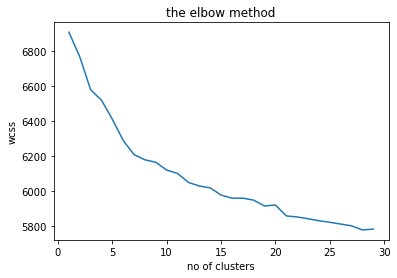

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 22, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(tfidf)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=22, n_init=20, n_jobs=1)

In [42]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer .get_feature_names()
for i in range(22):
    print("\n")
    print("groupe %d:" % i),
    for ind in order_centroids[i, :22]:
        print(' %s' % terms[ind]),
    print




groupe 0:
 movie
 time
 just
 watch
 year
 esthetic
 know
 want
 read
 story
 make
 years
 world
 film
 think
 support
 music
 really
 movies
 funny
 today
 star


groupe 1:
 schtick
 karaoke
 determine
 tries
 possible
 rlybt
 culture
 podcast
 hope
 enjoy
 sports
 funny
 episode
 minutes
 spotify
 usually
 ones
 great
 gender
 genre
 general
 genuinely


groupe 2:
 amazon
 music
 good
 fuck
 fucking
 gonna
 japan
 live
 zero
 genre
 general
 george
 genuinely
 gave
 gets
 getting
 gift
 girl
 gender
 games
 gators
 gaming


groupe 3:
 esthetic
 just
 different
 think
 look
 looks
 really
 design
 miss
 time
 beautiful
 shit
 nice
 high
 probably
 cute
 process
 going
 said
 used
 year
 things


groupe 4:
 good
 news
 funny
 sports
 movie
 music
 really
 just
 esthetic
 like
 think
 great
 today
 time
 share
 make
 year
 taste
 clear
 life
 days
 does


groupe 5:
 funny
 sports
 just
 think
 team
 know
 women
 fans
 talk
 really
 thing
 football
 time
 play
 pretty
 game
 great
 mak